# IDSF Machine learning using DoS dataset
Import data set from csv file

NOTE: Using the MQTT-malaria program with only Dos attack


### 1.Data preparation

Drop unique field

Drop frame.time_delta_displayed, frame.time_epoch, frame.time_invalid, ip.src, ip.dst, eth.src, eth.dst, frame.cap_len , frame.coloring_rule.name, frame.coloring_rule.string, frame.comment, frame.comment.expert, frame.encap_type, frame.file_off, frame.ignored, frame.incomplete, frame.interface_id , frame.interface_name, frame.link_nr ,frame.marked, frame.md5_hash , frame.number , frame.offset_shift 

Convert col: mqtt.clientid (use clientid_len), mqtt.msg (yes/no), mqtt.msgid (y/n), mqtt.passwd (y/n), mqtt.topic (y/n) , mqtt.username (y/n)

Not using normalize or standadise

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#feature to extract
featurenamefile = 'Feature_name.dat'
with open(featurenamefile) as file:
    feature_name = [line.rstrip() for line in file]
file.close()
ft_dict = {key: i for i, key in enumerate(feature_name)}
n_feature = len(feature_name)

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

filename='captured_dataset_07-04-2023_1226.csv'
df = pd.read_csv(filename,na_values='',low_memory=False,names=feature_name, header=None)
df.head(5)


,frame.time_delta,frame.time_relative,ip.len,ip.protocol,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.time_relative,tcp.time_delta,...,mqtt.conact.flags.sp,mqtt.conack.val,mqtt.topic_len,mqtt.topic,mqtt.msgid,mqtt.msglen,mqtt.msg,mqtt.sub.qos,mqtt.suback.qos,label
0,13.813409,13.813409,60,6,10.45.0.2,192.168.57.4,47297,1883,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.002317,13.815727,60,6,192.168.57.4,10.45.0.2,1883,47297,0.000539,0.000539,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.001783,13.817509,52,6,10.45.0.2,192.168.57.4,47297,1883,0.001095,0.000556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.001332,13.818841,60,6,10.45.0.2,192.168.57.4,41377,1883,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.001577,13.820418,60,6,192.168.57.4,10.45.0.2,1883,41377,0.000165,0.000165,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Preprocessing

In [3]:
df['label'] = 0
df.loc[df["ip.src"] == '10.45.0.3', "label"] = 1
df.head()


,frame.time_delta,frame.time_relative,ip.len,ip.protocol,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.time_relative,tcp.time_delta,...,mqtt.conact.flags.sp,mqtt.conack.val,mqtt.topic_len,mqtt.topic,mqtt.msgid,mqtt.msglen,mqtt.msg,mqtt.sub.qos,mqtt.suback.qos,label
0,29.411797,29.411797,60,6,10.45.0.2,192.168.57.4,57005,1883,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,0.003690,29.415487,60,6,192.168.57.4,10.45.0.2,1883,57005,0.000670,0.000670,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,0.003304,29.418791,52,6,10.45.0.2,192.168.57.4,57005,1883,0.002219,0.001549,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,0.003053,29.421844,66,6,10.45.0.2,192.168.57.4,57005,1883,0.002691,0.000472,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,0.003849,29.425693,52,6,192.168.57.4,10.45.0.2,1883,57005,0.002901,0.000210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
drop_cols = ['ip.protocol','ip.src', 'ip.dst', 'mqtt.clientid', 'mqtt.willtopic', 'mqtt.willmsg','mqtt.username','mqtt.passwd', 'mqtt.topic','mqtt.msgid','mqtt.msg'] 
df.drop(drop_cols,axis=1,inplace=True)

In [5]:
df.fillna(0,inplace=True)
df.head(5)

,frame.time_delta,frame.time_relative,ip.len,tcp.srcport,tcp.dstport,tcp.time_relative,tcp.time_delta,mqtt.num,mqtt.hdrflags,mqtt.msgtype,...,mqtt.username_len,mqtt.passwd_len,mqtt.conack.flags,mqtt.conact.flags.sp,mqtt.conack.val,mqtt.topic_len,mqtt.msglen,mqtt.sub.qos,mqtt.suback.qos,label
0,29.411797,29.411797,60,57005,1883,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.003690,29.415487,60,1883,57005,0.000670,0.000670,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.003304,29.418791,52,57005,1883,0.002219,0.001549,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.003053,29.421844,66,57005,1883,0.002691,0.000472,1.0,16.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.003849,29.425693,52,1883,57005,0.002901,0.000210,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [6]:
df.loc[0,'frame.time_delta'] = 0
df.sort_values('frame.time_relative',inplace=True)
df.head(5)

,frame.time_delta,frame.time_relative,ip.len,tcp.srcport,tcp.dstport,tcp.time_relative,tcp.time_delta,mqtt.num,mqtt.hdrflags,mqtt.msgtype,...,mqtt.username_len,mqtt.passwd_len,mqtt.conack.flags,mqtt.conact.flags.sp,mqtt.conack.val,mqtt.topic_len,mqtt.msglen,mqtt.sub.qos,mqtt.suback.qos,label
0,0.000000,29.411797,60,57005,1883,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.003690,29.415487,60,1883,57005,0.000670,0.000670,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.003304,29.418791,52,57005,1883,0.002219,0.001549,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.003053,29.421844,66,57005,1883,0.002691,0.000472,1.0,16.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.003849,29.425693,52,1883,57005,0.002901,0.000210,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [7]:
df.loc[df["mqtt.protoname"] == 'MQTT', "mqtt.protoname"] = 1
df.head()


,frame.time_delta,frame.time_relative,ip.len,tcp.srcport,tcp.dstport,tcp.time_relative,tcp.time_delta,mqtt.num,mqtt.hdrflags,mqtt.msgtype,...,mqtt.username_len,mqtt.passwd_len,mqtt.conack.flags,mqtt.conact.flags.sp,mqtt.conack.val,mqtt.topic_len,mqtt.msglen,mqtt.sub.qos,mqtt.suback.qos,label
0,0.000000,29.411797,60,57005,1883,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.003690,29.415487,60,1883,57005,0.000670,0.000670,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.003304,29.418791,52,57005,1883,0.002219,0.001549,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.003053,29.421844,66,57005,1883,0.002691,0.000472,1.0,16.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.003849,29.425693,52,1883,57005,0.002901,0.000210,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [8]:
df['mqtt.protoname'] = df['mqtt.protoname'].apply(pd.to_numeric) 
bin_col = ['mqtt.dupflag','mqtt.retain','mqtt.protoname','mqtt.conflag.uname','mqtt.conflag.passwd','mqtt.conflag.willretain','mqtt.conflag.willqos','mqtt.conflag.willflag','mqtt.conflag.cleansess','mqtt.conflag.reserved','mqtt.conact.flags.sp']


In [9]:
df['label'] = df['label'].astype(int)

In [10]:
# # no need
# # special_col = ['mqtt.hdrflags','mqtt.conflags','mqtt.conack.flags']
# # for col in special_col:
# #     df[col].fillna('0x0',inplace=True)
# #     df[col] = df[col].apply(lambda x: int(x,16))

# bin_col = ['mqtt.conack.flags.reserved','mqtt.conack.flags.sp','mqtt.conflag.cleansess','mqtt.conflag.passwd','mqtt.conflag.qos','mqtt.conflag.reserved','mqtt.conflag.retain','mqtt.conflag.uname','mqtt.conflag.willflag','mqtt.dupflag','mqtt.retain']

# nominal_col = ['mqtt.conack.flags','mqtt.protoname','mqtt.msgtype','mqtt.qos','mqtt.sub.qos','mqtt.suback.qos','mqtt.ver','mqtt.willmsg']
# # df['mqtt.protoname'] = df['mqtt.protoname'].apply(lambda x: 1 if x == 'MQTT' else 0)

# numeric_col = ['frame.time_delta','frame.time_relative','tcp.srcport','tcp.dstport','frame.len','mqtt.clientid_len','mqtt.conack.val','mqtt.kalive','mqtt.len','mqtt.passwd_len','mqtt.proto_len','mqtt.topic_len','mqtt.username_len','mqtt.willmsg_len','mqtt.willtopic_len']

# # df['frame.time_delta'] = pd.to_numeric( df['frame.time_delta'] )
# # df['frame.time_relative'] =  pd.to_numeric(df['frame.time_relative'])

# df.fillna(0,inplace=True)

# df['type'] = df['type'].apply(lambda x: 0 if x == 'normal' else 1)

Explore dataset:

In [11]:
print('size row,col:',len(df.index),len(df.columns))

colnames = list(df.columns)
print(colnames)

print()
print(df.dtypes)

print()
for i in range(len(colnames)):
    print(i,' ',colnames[i],' : ')
    vc = df[colnames[i]].value_counts()
    # vc = vc.reindex(sorted(vc.keys()))
    print(vc)

# print()
# for i in range(len(colnames)):
#     print(df[colnames[i]].describe())
#     print()

# numeric_cols = []
# print()
# for i in range(len(numeric_cols)):
#     print(i,' ',numeric_cols[i],' : ')
#     print(min(df[numeric_cols[i]]))
#     print(max(df[numeric_cols[i]]))
#     print()

# df['http_version'].unique()


size row,col: 302600 39
['frame.time_delta', 'frame.time_relative', 'ip.len', 'tcp.srcport', 'tcp.dstport', 'tcp.time_relative', 'tcp.time_delta', 'mqtt.num', 'mqtt.hdrflags', 'mqtt.msgtype', 'mqtt.dupflag', 'mqtt.qos', 'mqtt.retain', 'mqtt.len', 'mqtt.proto_len', 'mqtt.protoname', 'mqtt.ver', 'mqtt.conflags', 'mqtt.conflag.uname', 'mqtt.conflag.passwd', 'mqtt.conflag.willretain', 'mqtt.conflag.willqos', 'mqtt.conflag.willflag', 'mqtt.conflag.cleansess', 'mqtt.conflag.reserved', 'mqtt.kalive', 'mqtt.clientid_len', 'mqtt.willtopic_len', 'mqtt.willmsg_len', 'mqtt.username_len', 'mqtt.passwd_len', 'mqtt.conack.flags', 'mqtt.conact.flags.sp', 'mqtt.conack.val', 'mqtt.topic_len', 'mqtt.msglen', 'mqtt.sub.qos', 'mqtt.suback.qos', 'label']

frame.time_delta           float64
frame.time_relative        float64
ip.len                       int64
tcp.srcport                  int64
tcp.dstport                  int64
tcp.time_relative          float64
tcp.time_delta             float64
mqtt.num   

In [12]:
print(len(df))

302600


### 1.2.Split dataset to train and test 
Train   : 80%
Test    : 20%

In [13]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)
dataX = df.drop([ 'label'], axis=1)
dataY = df['label']

train_X = train.drop(['label'], axis=1)
train_Y = train['label']

test_X = test.drop(['label'], axis=1)
test_Y = test['label']

type_class = train['label'].unique()
print(type_class)


[1 0]


In [ ]:
# Extract feature name
test_cols = list(test_X.columns)

featurenamefile = 'Feature_use_training.dat'
f = open(featurenamefile,'w')
for name in test_cols:
    f.write(name+'\n')
f.close()

### 1.3.Visualise the distribution of dataset

<AxesSubplot: >

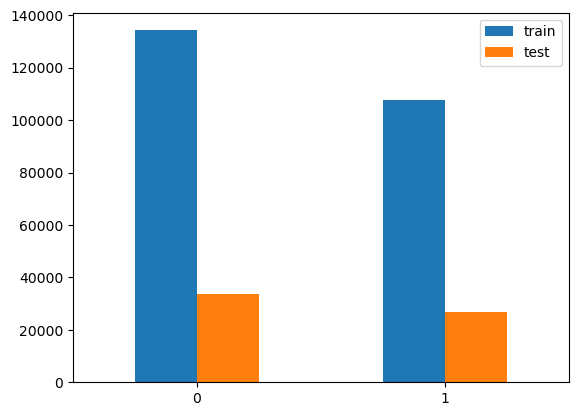

In [14]:
pd.DataFrame({
  'train': train['label'].value_counts(),
  'test': test['label'].value_counts()},
  ).plot.bar(rot=0)

<AxesSubplot: >

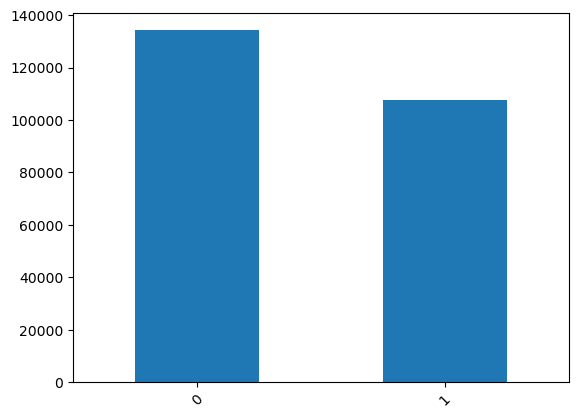

In [15]:
train_Y.value_counts().plot.bar(rot=45)

## 2.ML (without cross-validation)


### 2.1.LinearSVC

**default loss : ‘squared_hinge’ is like hinge but is quadratically penalized.**

In [ ]:
from sklearn.svm import LinearSVC
from sklearn import metrics

#Train
lsvc_model = LinearSVC(C=0.1, dual=False, max_iter=10000)
lsvc_model.fit(train_X, train_Y)

lsvc_preds = lsvc_model.predict(train_X)
lsvc_accuracy = metrics.accuracy_score(train_Y, lsvc_preds)
print('train acc:',lsvc_accuracy)

#Test
lsvc_test_preds = lsvc_model.predict(test_X)
lsvc_test_accuracy = metrics.accuracy_score(test_Y, lsvc_test_preds)
print('test acc:',lsvc_test_accuracy)

In [ ]:
#Evaluate
print(metrics.classification_report(test_Y,lsvc_test_preds))

conf_matrix = metrics.confusion_matrix(test_Y, lsvc_test_preds, labels=type_class)
metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=type_class).plot(xticks_rotation=90)

# precision_score, recall_score, fbeta_score, count = metrics.precision_recall_fscore_support(test_Y,lsvc_test_preds,labels=type_class)
# print(precision_score, recall_score, fbeta_score)

from sklearn.metrics import roc_curve,RocCurveDisplay
roc_display = RocCurveDisplay.from_estimator(lsvc_model,test_X,test_Y)

In [ ]:
import joblib

modelfile = 'IDSF_model'
filetype = '.joblib'

# linearSVC
filename = modelfile + '_LSVC' + filetype
joblib.dump(lsvc_model,filename)


### 2.2.SGDClassifier (not recommend)

**SVM with logistic regression, a probabilistic classifier**

SGDClassifier can optimize the same cost function as LinearSVC by adjusting the penalty and loss parameters. In addition it requires less memory, allows incremental (online) learning, and implements various loss functions and regularization regimes.

Stochastic Gradient Descent is sensitive to feature scaling, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0,1] or [-1,+1], or standardize it to have mean 0 and variance 1. Note that the same scaling must be applied to the test vector to obtain meaningful results

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

#Train
sgd_model = SGDClassifier(loss='log',max_iter=10000)
sgd_model.fit(train_X, train_Y)

sgd_preds = sgd_model.predict(train_X)
sgd_accuracy = metrics.accuracy_score(train_Y, sgd_preds)
print('train acc:',sgd_accuracy)

#Test
sgd_test_preds = sgd_model.predict(test_X)
sgd_test_accuracy = metrics.accuracy_score(test_Y, sgd_test_preds)
print('test acc:',sgd_test_accuracy)

In [ ]:
#Evaluate
print(metrics.classification_report(test_Y,sgd_test_preds))

conf_matrix = metrics.confusion_matrix(test_Y, sgd_test_preds, labels=type_class)
metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=type_class).plot()

from sklearn.metrics import roc_curve,RocCurveDisplay
roc_display = RocCurveDisplay.from_estimator(sgd_model,test_X,test_Y) 

In [ ]:
import joblib

modelfile = 'IDSF_model'
filetype = '.joblib'

# SGDC
filename = modelfile + '_SGDC' + filetype
joblib.dump(sgd_model,filename)


### 2.3 Decision Tree

random forest

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(train_X, train_Y)

dt_clf_train_preds = dt_clf.predict(train_X)
dt_clf_train_accuracy = metrics.accuracy_score(train_Y, dt_clf_train_preds)
print('train acc:',dt_clf_train_accuracy)

#Test
dt_clf_test_preds = dt_clf.predict(test_X)
dt_clf_test_accuracy = metrics.accuracy_score(test_Y, dt_clf_test_preds)
print('test acc:',dt_clf_test_accuracy)

In [ ]:
#Evaluate
print(metrics.classification_report(test_Y,dt_clf_test_preds))

conf_matrix = metrics.confusion_matrix(test_Y, dt_clf_test_preds, labels=type_class)
metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=type_class).plot()

from sklearn.metrics import roc_curve,RocCurveDisplay
roc_display = RocCurveDisplay.from_estimator(dt_clf,test_X,test_Y) 

In [ ]:
import joblib

modelfile = 'IDSF_model'
filetype = '.joblib'

# Decision Tree
filename = modelfile + '_DT' + filetype
joblib.dump(dt_clf,filename)


### 2.4 NeuralNet

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

mpl_clf = MLPClassifier(solver='adam',
                        activation = 'relu',
                        alpha=1e-4,
                        learning_rate = 'adaptive',
                        hidden_layer_sizes=(50,38), 
                        random_state=1)
mpl_clf = mpl_clf.fit(train_X, train_Y)

mpl_clf_train_preds = mpl_clf.predict(train_X)
mpl_clf_train_accuracy = metrics.accuracy_score(train_Y, mpl_clf_train_preds)
print('train acc:',mpl_clf_train_accuracy)

#Test
mpl_clf_test_preds = mpl_clf.predict(test_X)
mpl_clf_test_accuracy = metrics.accuracy_score(test_Y, mpl_clf_test_preds)
print('test acc:',mpl_clf_test_accuracy)

In [ ]:
#Evaluate
print(metrics.classification_report(test_Y,mpl_clf_test_preds))

conf_matrix = metrics.confusion_matrix(test_Y, mpl_clf_test_preds, labels=type_class)
metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=type_class).plot()

from sklearn.metrics import roc_curve,RocCurveDisplay
roc_display = RocCurveDisplay.from_estimator(mpl_clf,test_X,test_Y) 

In [ ]:
import joblib

modelfile = 'IDSF_model'
filetype = '.joblib'

# neural net
filename = modelfile + '_Neural' + filetype
joblib.dump(mpl_clf,filename)


### 2.5 Non-linear SVM

Parameters of the RBF Kernel

When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics

rbf_svc_clf = SVC(C=0.1,kernel='rbf',gamma='auto',tol=1e-3)
rbf_svc_clf = rbf_svc_clf.fit(train_X, train_Y)

rbf_svc_clf_train_preds = rbf_svc_clf.predict(train_X)
rbf_svc_clf_train_accuracy = metrics.accuracy_score(train_Y, rbf_svc_clf_train_preds)
print('train acc:',rbf_svc_clf_train_accuracy)

#Test
rbf_svc_clf_test_preds = rbf_svc_clf.predict(test_X)
rbf_svc_clf_test_accuracy = metrics.accuracy_score(test_Y, rbf_svc_clf_test_preds)
print('test acc:',rbf_svc_clf_test_accuracy)

In [ ]:
#Evaluate
print(metrics.classification_report(test_Y,rbf_svc_clf_test_preds))

conf_matrix = metrics.confusion_matrix(test_Y, rbf_svc_clf_test_preds, labels=type_class)
metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=type_class).plot()

from sklearn.metrics import roc_curve,RocCurveDisplay
roc_display = RocCurveDisplay.from_estimator(rbf_svc_clf,test_X,test_Y) 

In [ ]:
import joblib

modelfile = 'IDSF_model'
filetype = '.joblib'

# RBF SVC
filename = modelfile + '_RBF_SVC' + filetype
joblib.dump(rbf_svc_clf,filename)


## 3.Grid Search: Hyperparameter Tuning

Default cv: default 5-fold cross validation


### 3.1 Linear

Linear get to optimal maxima but stochastic only go local maxima so it get the general characteristic instead of 

In [34]:
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score,cross_validate

lsvc_model = LinearSVC(C=0.1, dual=False, max_iter=10000)

#Cross-validation Train
lsvc_cv = cross_validate(lsvc_model,train_X,train_Y,return_estimator=True) 
print('mean=',lsvc_cv['test_score'].mean(),', std=',lsvc_cv['test_score'].std())

lsvc_train_preds = []
for mdl in lsvc_cv['estimator']:
    lsvc_train_preds.append(mdl.score(train_X,train_Y))
lsvc_accuracy = sum(lsvc_train_preds)/len(lsvc_train_preds)
print('mean train acc:',lsvc_accuracy)

#Test
lsvc_test_preds = []
for mdl in lsvc_cv['estimator']:
    lsvc_test_preds.append(mdl.score(test_X,test_Y)) 
lsvc_test_accuracy = sum(lsvc_test_preds)/len(lsvc_test_preds)
print('mean test acc:',lsvc_test_accuracy)

#Best estimator
best_mdl_idx = lsvc_test_preds.index(max(lsvc_test_preds))
lsvc_model = lsvc_cv['estimator'][best_mdl_idx]


mean= 1.0 , std= 0.0
mean train acc: 1.0
mean test acc: 1.0


In [ ]:
import joblib

modelfile = 'IDSF_model'
filetype = '.joblib'

# linearSVC
filename = modelfile + '_LSVC' + filetype
joblib.dump(lsvc_model,filename)


### 3.2 SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score,cross_validate

sgd_model = SGDClassifier(loss='log',max_iter=10000)

#Cross-validation Train
sgd_cv = cross_validate(sgd_model,train_X,train_Y,return_estimator=True) 
print('mean=',sgd_cv['test_score'].mean(),', std=',sgd_cv['test_score'].std())

sgd_train_preds = []
for mdl in sgd_cv['estimator']:
    sgd_train_preds.append(mdl.score(train_X,train_Y))
sgd_accuracy = sum(sgd_train_preds)/len(sgd_train_preds)
print('mean train acc:',sgd_accuracy)

#Test
sgd_test_preds = []
for mdl in sgd_cv['estimator']:
    sgd_test_preds.append(mdl.score(test_X,test_Y)) 
sgd_test_accuracy = sum(sgd_test_preds)/len(sgd_test_preds)
print('mean test acc:',sgd_test_accuracy)

#Best estimator
best_mdl_idx = sgd_test_preds.index(max(sgd_test_preds))
sgd_model = sgd_cv['estimator'][best_mdl_idx]


In [ ]:
import joblib

modelfile = 'IDSF_model'
filetype = '.joblib'

# SGDC
filename = modelfile + '_SGDC' + filetype
joblib.dump(sgd_model,filename)


### 3.3 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score,cross_validate

dt_clf = DecisionTreeClassifier()

#Cross-validation Train
dt_clf_cv = cross_validate(dt_clf,train_X,train_Y,return_estimator=True) 
print('mean=',dt_clf_cv['test_score'].mean(),', std=',dt_clf_cv['test_score'].std())

dt_clf_train_preds = []
for mdl in dt_clf_cv['estimator']:
    dt_clf_train_preds.append(mdl.score(train_X,train_Y))
dt_clf_accuracy = sum(dt_clf_train_preds)/len(dt_clf_train_preds)
print('mean train acc:',dt_clf_accuracy)

#Test
dt_clf_test_preds = []
for mdl in dt_clf_cv['estimator']:
    dt_clf_test_preds.append(mdl.score(test_X,test_Y)) 
dt_clf_test_accuracy = sum(dt_clf_test_preds)/len(dt_clf_test_preds)
print('mean test acc:',dt_clf_test_accuracy)

#Best estimator
best_mdl_idx = dt_clf_test_preds.index(max(dt_clf_test_preds))
dt_clf = dt_clf_cv['estimator'][best_mdl_idx]


In [ ]:
import joblib

modelfile = 'IDSF_model'
filetype = '.joblib'

# Decision Tree
filename = modelfile + '_DT' + filetype
joblib.dump(dt_clf,filename)


### 3.4 Neural Net

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score,cross_validate

mpl_clf = MLPClassifier(solver='adam',
                        activation = 'relu',
                        alpha=1e-4,
                        learning_rate = 'adaptive',
                        hidden_layer_sizes=(50,38), 
                        random_state=1)

#Cross-validation Train
mpl_clf_cv = cross_validate(mpl_clf,train_X, train_Y,return_estimator=True)
print('mean=',mpl_clf_cv['test_score'].mean(),', std=',mpl_clf_cv['test_score'].std())

mpl_cv_train_preds = []
for mdl in mpl_clf_cv['estimator']:
    mpl_cv_train_preds.append(mdl.score(train_X,train_Y))
mpl_cv_train_accuracy = sum(mpl_cv_train_preds)/len(mpl_cv_train_preds)
print('mean train acc:',mpl_cv_train_accuracy)

#Test
mpl_cv_test_preds = []
for mdl in mpl_clf_cv['estimator']:
    mpl_cv_test_preds.append(mdl.score(test_X,test_Y)) 
mpl_cv_test_accuracy = sum(mpl_cv_test_preds)/len(mpl_cv_test_preds)
print('mean test acc:',mpl_cv_test_accuracy)

#Best estimator
best_mdl_idx = mpl_cv_test_preds.index(max(mpl_cv_test_preds))
mpl_clf = mpl_clf_cv['estimator'][best_mdl_idx]


In [ ]:
# # mpl_cv_test_preds=mpl_clf_test_preds.copy()
# best_mpl_model = mpl_clf_cv['estimator'][mpl_cv_test_preds.index(max(mpl_cv_test_preds))]

# mpl_clf_test_preds = best_mpl_model.predict(test_X)
# mpl_clf_test_accuracy = metrics.accuracy_score(test_Y, mpl_clf_test_preds)
# print('test acc:',mpl_clf_test_accuracy)

# #Evaluate
# print(metrics.classification_report(test_Y,mpl_clf_test_preds))

# conf_matrix = metrics.confusion_matrix(test_Y, mpl_clf_test_preds, labels=type_class)
# metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=type_class).plot()

# from sklearn.metrics import roc_curve,RocCurveDisplay
# roc_display = RocCurveDisplay.from_estimator(best_mpl_model,test_X,test_Y) 

In [ ]:
import joblib

modelfile = 'IDSF_model'
filetype = '.joblib'

# neural net
filename = modelfile + '_Neural' + filetype
joblib.dump(mpl_clf,filename)

### 3.5 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score,cross_validate

rf_clf = RandomForestClassifier()

#Cross-validation Train
rf_clf_cv = cross_validate(rf_clf,train_X,train_Y,return_estimator=True) 
print('mean=',rf_clf_cv['test_score'].mean(),', std=',rf_clf_cv['test_score'].std())

rf_clf_train_preds = []
for mdl in rf_clf_cv['estimator']:
    rf_clf_train_preds.append(mdl.score(train_X,train_Y))
rf_clf_accuracy = sum(rf_clf_train_preds)/len(rf_clf_train_preds)
print('mean train acc:',rf_clf_accuracy)

#Test
rf_clf_test_preds = []
for mdl in rf_clf_cv['estimator']:
    rf_clf_test_preds.append(mdl.score(test_X,test_Y)) 
rf_clf_test_accuracy = sum(rf_clf_test_preds)/len(rf_clf_test_preds)
print('mean test acc:',rf_clf_test_accuracy)

#Best estimator
best_mdl_idx = rf_clf_test_preds.index(max(rf_clf_test_preds))
rf_clf = rf_clf_cv['estimator'][best_mdl_idx]


In [ ]:
import joblib

modelfile = 'IDSF_model'
filetype = '.joblib'

# Decision Tree
filename = modelfile + '_RF' + filetype
joblib.dump(rf_clf,filename)


### 3.6 XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score,cross_validate

xgb_clf = XGBClassifier(learning_rate= 0.4, gamma=0.5, min_child_weight= 10, colsample_bytree= 1.0, max_depth= 5, subsample= 0.8)

#Cross-validation Train
xgb_clf_cv = cross_validate(xgb_clf,train_X,train_Y,return_estimator=True) 
print('mean=',xgb_clf_cv['test_score'].mean(),', std=',xgb_clf_cv['test_score'].std())

xgb_clf_train_preds = []
for mdl in xgb_clf_cv['estimator']:
    xgb_clf_train_preds.append(mdl.score(train_X,train_Y))
xgb_clf_accuracy = sum(xgb_clf_train_preds)/len(xgb_clf_train_preds)
print('mean train acc:',xgb_clf_accuracy)

#Test
xgb_clf_test_preds = []
for mdl in xgb_clf_cv['estimator']:
    xgb_clf_test_preds.append(mdl.score(test_X,test_Y)) 
xgb_clf_test_accuracy = sum(xgb_clf_test_preds)/len(xgb_clf_test_preds)
print('mean test acc:',xgb_clf_test_accuracy)

#Best estimator
best_mdl_idx = xgb_clf_test_preds.index(max(xgb_clf_test_preds))
xgb_clf = xgb_clf_cv['estimator'][best_mdl_idx]


In [ ]:
import joblib

modelfile = 'IDSF_model'
filetype = '.joblib'

# Decision Tree
filename = modelfile + '_XGBoost_tuned' + filetype
joblib.dump(xgb_clf,filename)


## 4. Model save and load

Save model to pickle file

In [ ]:
import joblib

modelfile = 'IDSF_model'
filetype = '.joblib'

# linearSVC
filename = modelfile + '_LSVC' + filetype
joblib.dump(lsvc_model,filename)

# SGDC
filename = modelfile + '_SGDC' + filetype
joblib.dump(sgd_model,filename)

# Decision Tree
filename = modelfile + '_DT' + filetype
joblib.dump(dt_clf,filename)

# neural net
filename = modelfile + '_Neural' + filetype
joblib.dump(mpl_clf,filename)

# RBF SVC
# filename = modelfile + '_RBF_SVC' + filetype
# joblib.dump(rbf_svc_clf,filename)


#### LOAD LSVC

LinearSVC(C=0.1, dual=False, max_iter=10000)
test acc: 0.8426140118968936
test precision: 0.7388837107297549
test F1: 0.7388837107297549
              precision    recall  f1-score   support

           0       1.00      0.72      0.83    167835
           1       0.74      1.00      0.85    134765

    accuracy                           0.84    302600
   macro avg       0.87      0.86      0.84    302600
weighted avg       0.88      0.84      0.84    302600



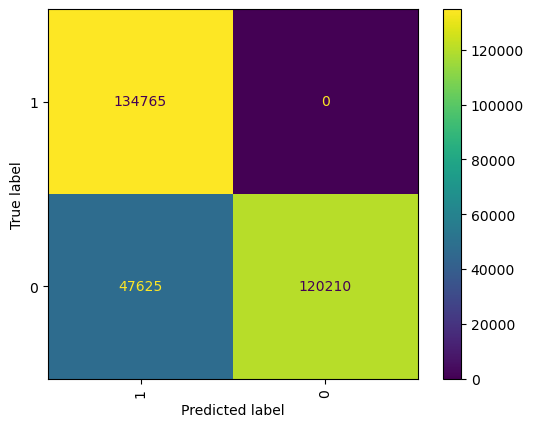

In [16]:
# Load
import joblib
from sklearn import metrics

test_X = dataX
test_Y = dataY

modelfile = 'IDSF_model'
filetype = '.joblib'

# linearSVC
filename = modelfile + '_LSVC' + filetype
loaded_model = joblib.load(filename)
print(loaded_model)

lsvc_test_preds = loaded_model.predict(test_X)
lsvc_test_accuracy = metrics.accuracy_score(test_Y, lsvc_test_preds)
print('test acc:',lsvc_test_accuracy)
lsvc_test_precision = metrics.precision_score(test_Y, lsvc_test_preds)
print('test precision:',lsvc_test_precision)
lsvc_test_f1 = metrics.f1_score(test_Y, lsvc_test_preds)
print('test F1:',lsvc_test_precision)

# #Evaluate
print(metrics.classification_report(test_Y,lsvc_test_preds))

conf_matrix = metrics.confusion_matrix(test_Y, lsvc_test_preds, labels=type_class)
metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=type_class).plot(xticks_rotation=90)

# result = loaded_model.score(test_X, test_Y)
# print(loaded_model,result)


#### LOAD SGDC

SGDClassifier(loss='log', max_iter=10000)
test acc: 0.9960343688037012
test precision: 1.0
test F1: 1.0
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    167835
           1       1.00      0.99      1.00    134765

    accuracy                           1.00    302600
   macro avg       1.00      1.00      1.00    302600
weighted avg       1.00      1.00      1.00    302600



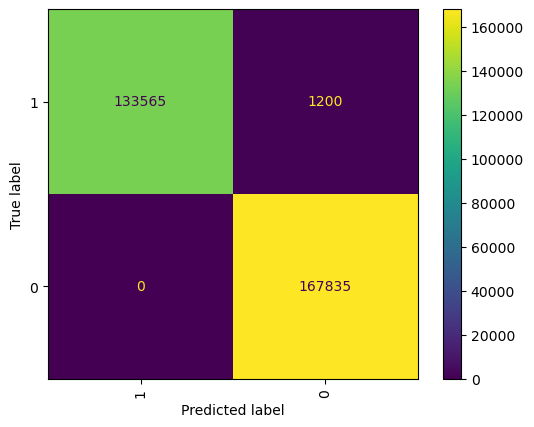

In [17]:
# SGDC
filename = modelfile + '_SGDC' + filetype
loaded_model = joblib.load(filename)
print(loaded_model)

lsvc_test_preds = loaded_model.predict(test_X)
lsvc_test_accuracy = metrics.accuracy_score(test_Y, lsvc_test_preds)
print('test acc:',lsvc_test_accuracy)
lsvc_test_precision = metrics.precision_score(test_Y, lsvc_test_preds)
print('test precision:',lsvc_test_precision)
lsvc_test_recall = metrics.recall_score(test_Y, lsvc_test_preds)
print('test recall:',lsvc_test_recall)
lsvc_test_f1 = metrics.f1_score(test_Y, lsvc_test_preds)
print('test F1:',lsvc_test_precision)

# #Evaluate
print(metrics.classification_report(test_Y,lsvc_test_preds))

conf_matrix = metrics.confusion_matrix(test_Y, lsvc_test_preds, labels=type_class)
metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=type_class).plot(xticks_rotation=90)

# result = loaded_model.score(test_X, test_Y)
# print(loaded_model,result)


#### LOAD DT

DecisionTreeClassifier()
test acc: 0.5546034368803702
test precision: 0.0
test F1: 0.0
              precision    recall  f1-score   support

           0       0.55      1.00      0.71    167835
           1       0.00      0.00      0.00    134765

    accuracy                           0.55    302600
   macro avg       0.28      0.50      0.36    302600
weighted avg       0.31      0.55      0.40    302600



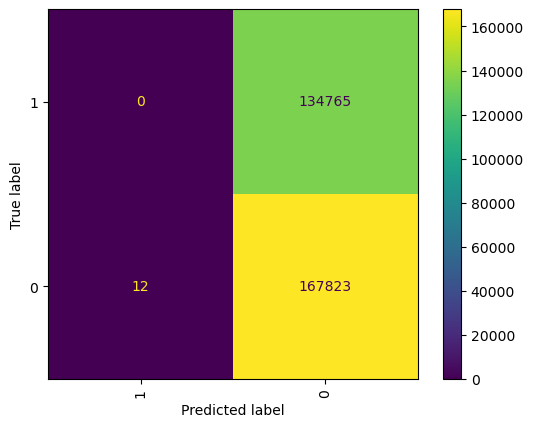

In [18]:

# Decision Tree
filename = modelfile + '_DT' + filetype
loaded_model = joblib.load(filename)
print(loaded_model)

lsvc_test_preds = loaded_model.predict(test_X)
lsvc_test_accuracy = metrics.accuracy_score(test_Y, lsvc_test_preds)
print('test acc:',lsvc_test_accuracy)
lsvc_test_precision = metrics.precision_score(test_Y, lsvc_test_preds)
print('test precision:',lsvc_test_precision)
lsvc_test_recall = metrics.recall_score(test_Y, lsvc_test_preds)
print('test recall:',lsvc_test_recall)
lsvc_test_f1 = metrics.f1_score(test_Y, lsvc_test_preds)
print('test F1:',lsvc_test_precision)

# #Evaluate
print(metrics.classification_report(test_Y,lsvc_test_preds))

conf_matrix = metrics.confusion_matrix(test_Y, lsvc_test_preds, labels=type_class)
metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=type_class).plot(xticks_rotation=90)

# result = loaded_model.score(test_X, test_Y)
# print(loaded_model,result)


#### LOAD Neural Net

MLPClassifier(hidden_layer_sizes=(50, 38), learning_rate='adaptive',
              random_state=1)
test acc: 0.9954659616655651
test precision: 1.0
test F1: 1.0
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    167835
           1       1.00      0.99      0.99    134765

    accuracy                           1.00    302600
   macro avg       1.00      0.99      1.00    302600
weighted avg       1.00      1.00      1.00    302600



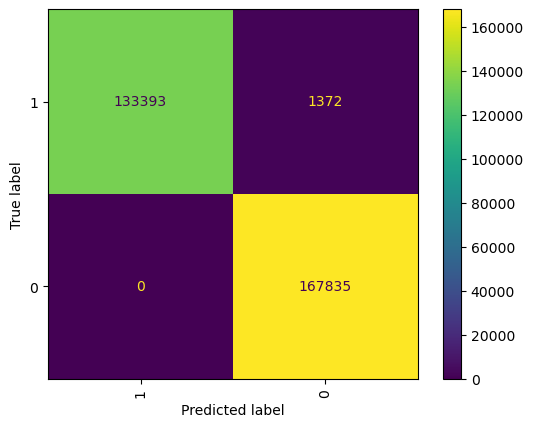

In [19]:
# neural net
filename = modelfile + '_Neural' + filetype
loaded_model = joblib.load(filename)
print(loaded_model)

lsvc_test_preds = loaded_model.predict(test_X)
lsvc_test_accuracy = metrics.accuracy_score(test_Y, lsvc_test_preds)
print('test acc:',lsvc_test_accuracy)
lsvc_test_precision = metrics.precision_score(test_Y, lsvc_test_preds)
print('test precision:',lsvc_test_precision)
lsvc_test_recall = metrics.recall_score(test_Y, lsvc_test_preds)
print('test recall:',lsvc_test_recall)
lsvc_test_f1 = metrics.f1_score(test_Y, lsvc_test_preds)
print('test F1:',lsvc_test_precision)

# #Evaluate
print(metrics.classification_report(test_Y,lsvc_test_preds))

conf_matrix = metrics.confusion_matrix(test_Y, lsvc_test_preds, labels=type_class)
metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=type_class).plot(xticks_rotation=90)

# result = loaded_model.score(test_X, test_Y)
# print(loaded_model,result)


#### LOAD Random Forest

RandomForestClassifier()
test acc: 0.9873959021810972
test precision: 1.0
test F1: 1.0
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    167835
           1       1.00      0.97      0.99    134765

    accuracy                           0.99    302600
   macro avg       0.99      0.99      0.99    302600
weighted avg       0.99      0.99      0.99    302600



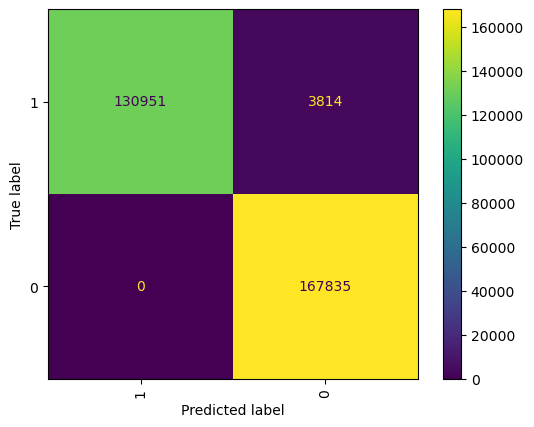

In [20]:
# random forest
filename = modelfile + '_RF' + filetype
loaded_model = joblib.load(filename)
print(loaded_model)

lsvc_test_preds = loaded_model.predict(test_X)
lsvc_test_accuracy = metrics.accuracy_score(test_Y, lsvc_test_preds)
print('test acc:',lsvc_test_accuracy)
lsvc_test_precision = metrics.precision_score(test_Y, lsvc_test_preds)
print('test precision:',lsvc_test_precision)
lsvc_test_recall = metrics.recall_score(test_Y, lsvc_test_preds)
print('test recall:',lsvc_test_recall)
lsvc_test_f1 = metrics.f1_score(test_Y, lsvc_test_preds)
print('test F1:',lsvc_test_precision)

# #Evaluate
print(metrics.classification_report(test_Y,lsvc_test_preds))

conf_matrix = metrics.confusion_matrix(test_Y, lsvc_test_preds, labels=type_class)
metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=type_class).plot(xticks_rotation=90)


#### LOAD XGBoost

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
test acc: 0.8840680766688698
test precision: 0.9998796485738356
test F1: 0.9998796485738356
              precision    recall  f1-score   support

           0       0.83      1.00      0.91    167835
           1       1.00      0.74      0.85    134765



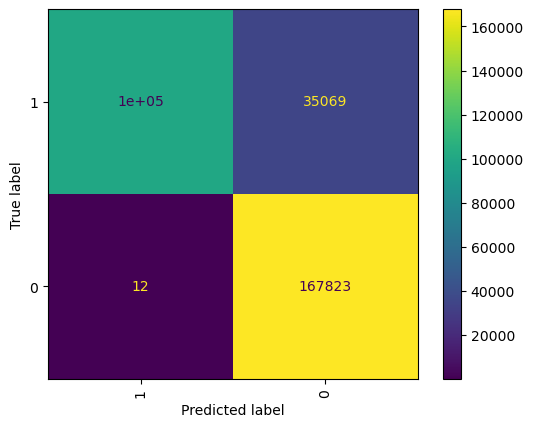

In [21]:
# XGB
filename = modelfile + '_XGBoost' + filetype
loaded_model = joblib.load(filename)
print(loaded_model)

lsvc_test_preds = loaded_model.predict(test_X)
lsvc_test_accuracy = metrics.accuracy_score(test_Y, lsvc_test_preds)
print('test acc:',lsvc_test_accuracy)
lsvc_test_precision = metrics.precision_score(test_Y, lsvc_test_preds)
print('test precision:',lsvc_test_precision)
lsvc_test_recall = metrics.recall_score(test_Y, lsvc_test_preds)
print('test recall:',lsvc_test_recall)
lsvc_test_f1 = metrics.f1_score(test_Y, lsvc_test_preds)
print('test F1:',lsvc_test_precision)

# #Evaluate
print(metrics.classification_report(test_Y,lsvc_test_preds))

conf_matrix = metrics.confusion_matrix(test_Y, lsvc_test_preds, labels=type_class)
metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=type_class).plot(xticks_rotation=90)



In [ ]:

# RBF SVC
# filename = modelfile + '_RBF_SVC' + filetype
# loaded_model = joblib.load(filename)
# result = loaded_model.score(test_X, test_Y)
# print(loaded_model,result)


note: XGBoost, RF

In [ ]:
import xgboost
print(xgboost.__version__)


In [ ]:
# import pandas module
import pandas as pd
 
# create dataframe with 3 columns
data = pd.DataFrame({
    "id": [7058, 7059, 7072, 7054],
    "name": ['sravan', 'jyothika', 'harsha', 'ramya'],
    "subjects": ['java', 'python', 'html/php', 'php/js']
}
)

colname = ['id','name','subjects']

df_temp  = pd.DataFrame(index=[0],columns=colname)
print(df_temp)

df_temp['id'] = 10
print(df_temp)
# print(data)

# row = pd.Series([1,'jon','c'],index = ['id','name','subjects'])
# print(row)

data = pd.concat([data,df_temp],ignore_index=True)

data['id'] = 10
print(type(data['id']))

# df = pd.DataFrame(0,index=[0], columns=colnames)
# testsr = pd.Series(0,index=colnames)

# print(testsr['frame.len'])



In [ ]:
from scapy.all import IP,TCP
ip_packet = IP()/TCP()

tcp_packet = ip_packet.payload
print(type(tcp_packet))

pay = tcp_packet.payload
print(type(pay))

if ip_packet.haslayer(IP):
    ip_packet = ip_packet[IP]
ip_packet.show()

In [ ]:
from datetime import datetime
datetime_str = datetime.now().strftime('%d-%m-%Y_%H%M')
csvfile = 'emulation_dataset_'+datetime_str+'.csv'
csvfile